Training data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

2025-09-24 18:06:22.958005: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3514 - loss: 1.7629 

2025-09-24 18:07:07.643148: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 122880000 exceeds 10% of free system memory.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 26ms/step - accuracy: 0.4438 - loss: 1.5344 - val_accuracy: 0.5143 - val_loss: 1.3231
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.5877 - loss: 1.1729 - val_accuracy: 0.6152 - val_loss: 1.0968
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 26ms/step - accuracy: 0.6469 - loss: 1.0089 - val_accuracy: 0.6336 - val_loss: 1.0351
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.6791 - loss: 0.9156 - val_accuracy: 0.6668 - val_loss: 0.9490
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.7063 - loss: 0.8376 - val_accuracy: 0.6755 - val_loss: 0.9338
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.7278 - loss: 0.7788 - val_accuracy: 0.7051 - val_loss: 0.8724
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 31ms/step - accuracy: 0.7464 - loss: 0.7281 - val_accuracy: 0.6930 - val_loss: 0.8984
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 40ms/step - accuracy: 0.7596 - loss: 0.68

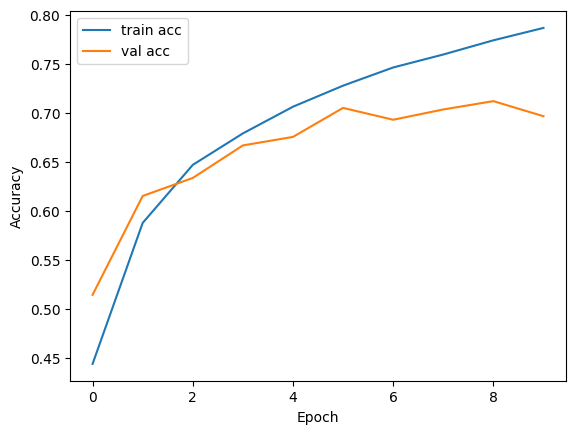

2025-09-24 18:15:13.360423: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 122880000 exceeds 10% of free system memory.


313/313 - 3s - 10ms/step - accuracy: 0.6966 - loss: 0.9312
Test accuracy: 0.6966000199317932


In [4]:
# Implementing a CNN using the CIFAR-10 dataset

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

#Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

#Normalizing the pixel values
x_train, x_test = x_train/255.0, x_test/255.0

print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)

#Building the CNN model
model = models.Sequential([
    #Convolutional layer 1
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    #Convolutional layer 2
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    #Convolutional layer 3
    layers.Conv2D(64, (3,3), activation='relu'),

    #flatten and Dense layers
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')

])

model.summary()

#Compile and train
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

#Visualizing
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#Evaluating and predictions
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("Test accuracy:", test_acc)